In [1]:
using Plots, LinearAlgebra, Random

In [2]:
# define hermitian conjugate
dag(v) = transpose(conj(v))

dag (generic function with 1 method)

In [3]:
function Liouvillian(H, ops)
    # defines the liouvillian operator taking the Hamiltonian H and the collapse operators
    # ops
    dim = size(H)[1]
    id = Matrix(I, dim, dim)
    # Kron is the tensot product
    res = -1im * (kron(H, id) - kron(id, transpose(H)))
    for op in ops
        res += kron(op, conj(op))
        res -= 1/2 * kron(dag(op) * op, id)
        res -= 1/2 * kron(id, transpose(op) * conj(op))
    end
    return res
end

Liouvillian (generic function with 1 method)

In [4]:
# Latice size
L = 7;

In [5]:
# create the collpase operators for each lattice site
ops = []
for p=1:L
    a_p = zeros(L+1, L+1)
    # annihilation operator
    a_p[end, p] = 1
    push!(ops, a_p)
end

In [6]:
H = zeros(L+1, L+1)
# Hopping Hamltonian
for i=1:L-1
    H += transpose(ops[i+1]) * ops[i]
    H += transpose(ops[i]) * ops[i+1]
end

In [7]:
function rho_t(rho_0, t, L)
    # Find the density matrix at time t from the L operator by defining
    # the time evolution operator U
    U = exp(L * t)
    rho_0_vec = reshape(rho_0, prod(size(rho_0)))
    return reshape(U * rho_0_vec, size(rho_0))
end

rho_t (generic function with 1 method)

In [8]:
# Operators meassuring the densities at each lattice site
dens_ops = [dag(op) * op for op in ops];

In [14]:
psi_0 = zeros(L+1) .+ 0im
# initial condition: Particle localized at site 4
psi_0[4] = 1
# initial density matrix
rho_0 = psi_0 * dag(psi_0)
# decoherence gamma of the liouvillian
gamma = 1
jump_ops = sqrt(gamma) .* ops
liou = Liouvillian(H, jump_ops);

In [10]:
ts = LinRange(0, 5, 100)
densities = zeros(L, length(ts))
for (i, t) in enumerate(ts)
    state = rho_t(rho_0, t, liou)
    # calculate the expectation values for the densities at each site using the trace
    # with the rho(t)
    densities[:, i] = [real(tr(dens_op * state)) for dens_op in dens_ops]
end
p = heatmap(densities);

In [11]:
norm_densities = densities ./ sum(densities, dims=1);

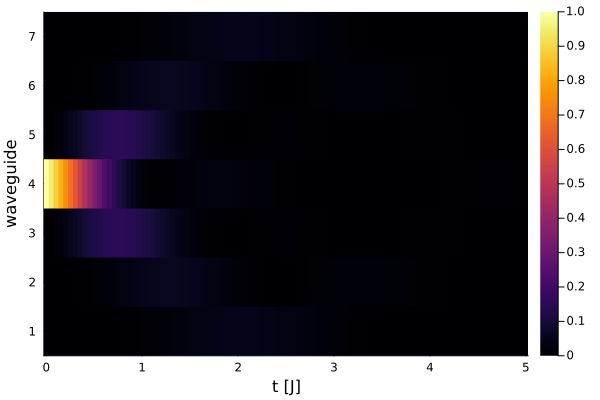

In [12]:
heatmap(ts, 1:L, densities)
xlabel!("t [J]")
ylabel!("waveguide")
#savefig("lindblad_loss_normalized.png")

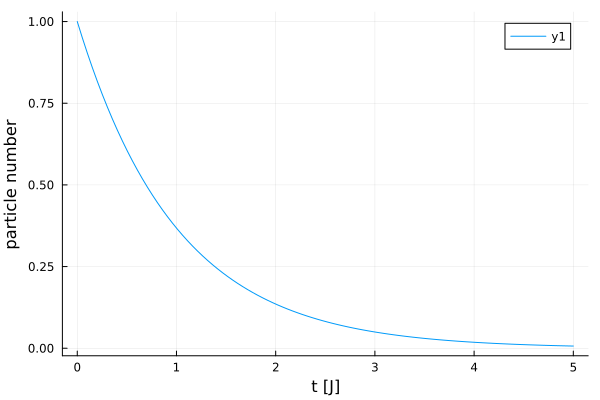

In [13]:
plot(ts, transpose(sum(densities, dims=1)))
xlabel!("t [J]")
ylabel!("particle number")
#savefig("particle_number_lindblad.png")